# CC3001 Otoño 2021 Tarea 4
# Cálculo de derivadas de fórmulas representadas mediante árboles
## Profesores
Sección 1 Iván Sipirán • Sección 2 Patricio Poblete • Sección 3 Nelson Baloian

El objetivo de esta tarea es aprender a procesar la información de árboles que representan fórmulas. Hay muchas cosas que uno puede hacer con estos árboles, y en esta tarea nos enfocaremos en particular en calcular la derivada de una fórmula respecto de una variable dada.

Específicamente, el problema es: dado un árbol que representa una fórmula, construir y retornar otro árbol que representa la derivada de la primera fórmula respecto de una variable dada.

La fórmula se entrega en notación de infijo (normal). En esta fórmula,
los operadores de menor prioridad son la suma (``+``) y la resta (``-``), de igual prioridad entre sí, luego vienen la multiplicación (``*``) y la división (``/``), también de igual prioridad entre sí, y finalmente el operador de mayor prioridad es la elevación a potencia (``^``). También se puede usar paréntesis. Para simplificar no usaremos el operador "menos unario". **Nota importante**: Para no complicar excesivamente las cosas, supondremos que en la elevación a potencia el exponente no contiene la variable respecto de la cual se está derivando.

A continuación usted encontrará las clases ``Nodoi``, ``Nodoe`` y ``Arbol`` que implementan árboles que representan fórmulas. La clase ``Arbol`` viene con un constructor que recibe un string como parámetro, el cual contiene una fórmula, y este constructor se encarga de transformar la fórmula de string a árbol, de modo que usted no necesita preocuparse de eso. Para simplificar, la fórmula solo podrá contener variables de una sola letra, números de un solo dígito, y sin espacios.

Usted tiene que implementar para la clase ``Arbol`` y para los nodos una función ``derivada`` que al ser invocada indicando el nombre de una variable, retorne un árbol que represente la derivada de la fórmula respectiva.

En este enunciado vienen funciones ``derivada`` triviales, que simplemente retornan la misma fórmula, sin derivarla. Usted debe reemplazarlas por la implementación correcta


In [ ]:
!pip install aed-utilities

  Created wheel for aed-utilities: filename=aed_utilities-0.5.2-cp37-none-any.whl size=4467 sha256=25fc3ae0f9fb3b35736b7f9f56541eaaae7415476d36c1068220b4223de93497
  Stored in directory: /root/.cache/pip/wheels/68/e6/33/33cadc26cc3b96e6f5830bb498d2c521b2e0fca7069fd52473
Successfully built aed-utilities


In [ ]:
import aed_utilities as aed

class Nodoi:
    def __init__(self, izq, info, der):
        self.izq=izq
        self.info=info
        self.der=der
    def postorden(self):
        self.izq.postorden()   
        self.der.postorden()
        print(self.info, end=" ")
    def derivada(self,x):
        """
        Separamos la derivada en casos, segun la suma, la resta, el producto,
        la division y la potencia
        """
        # Suma y resta
        if (self.info in ['+','-']):
          derivada = Nodoi(self.izq.derivada(x),
                      self.info,
                      self.der.derivada(x))
        # Regla del producto
        elif (self.info == '*'):
          hijo_izq = Nodoi(self.izq.derivada(x),
                           '*',
                           self.der)
          hijo_der = Nodoi(self.izq,
                           '*',
                           self.der.derivada(x))
          derivada = Nodoi(hijo_izq,
                      '+',
                      hijo_der)
        # Regla del cuociente
        elif (self.info == '/'):
          hijo_izq = Nodoi(Nodoi(self.izq.derivada(x), '*', self.der),
                           '-',
                           Nodoi(self.izq,'*',self.der.derivada(x)))
          hijo_der = Nodoi(self.der,
                           '^',
                           Nodoe(2))
          derivada = Nodoi(hijo_izq,
                           '/',
                           hijo_der)
        # Derivada de una potencia
        elif (self.info == '^'):
          hijo_izq = Nodoi(self.izq,
                           '*',
                           self.der)
          hijo_der = Nodoi(self.der,
                           '-',
                           Nodoe(1))
          derivada = Nodoi(hijo_izq,
                           self.info,
                           hijo_der)
        return derivada
class Nodoe:
    def __init__(self, info):
        self.info=info
    def postorden(self):
        print(self.info, end=" ")
    def derivada(self,x):
        """
        Deriva el nodo exterior, hay dos casos, cuando el nodo exterior es una 
        variable respecto a la que se integra, o cuando es una variable (o num)
        respecto a la que no se integra
        """
        if self.info.isdigit():
          return Nodoe(0)
        elif self.info.isalpha():
          if self.info == x:
            return Nodoe(1)
          else:
            return Nodoe(0)
        return self
class Arbol:
    def __init__(self,formula):
        if type(formula)!=str: # se supone que viene el árbol ya construído
          self.raiz=formula
          return
        # la fórmula viene en forma de string
        global k
        global s
        s=formula+";" # agregamos una marca de fin de la entrada
        k=0 # indica próximo caracter por procesar
        # definimos funciones para analizar la fórmula
        def expresion(): # retorna puntero a la raíz de un árbol que representa a la fórmula s
            global k
            global s
            a=factor()
            while s[k]=="+" or s[k]=="-":
                op=s[k]
                k+=1
                b=factor()
                a=Nodoi(a,op,b)
            return a
        def factor():
            global k
            global s
            a=termino()
            while s[k]=="*" or s[k]=="/":
                op=s[k]
                k+=1
                b=termino()
                a=Nodoi(a,op,b)
            return a
        def termino():
            global k
            global s
            a=primario()
            if s[k]=="^":
                op=s[k]
                k+=1
                b=termino()
                a=Nodoi(a,op,b)
            return a
        def primario(): # posible constante, variable o formula parentizada
            global k
            global s
            if s[k].isalpha() or s[k].isdigit():
                a=Nodoe(s[k])
                k+=1
                return a
            if s[k]=="(": # fórmula parentizada
                k+=1
                a=expresion()
                if s[k]!=")":
                    print("Error: Falta cierra paréntesis: "+formula[k:])
                    assert False
                k+=1
                return a
            print("Error: Falta variable, número o abre paréntesis: "+formula[k:])
            assert False
              
        a=expresion()
        if s[k]!=";":
            print("Error: Basura al final de la fórmula: "+formula[k:])
            assert False                
        self.raiz=a
    def derivada(self,x):
        return Arbol(self.raiz.derivada(x))
    def dibujar(self):
      btd = aed.BinaryTreeDrawer(fieldData="info", fieldLeft="izq", fieldRight="der",classNone=Nodoe )
      btd.draw_tree(self, "raiz")

A continuación probamos esta funcionalidad con varias fórmulas de ejemplo. Para ver si el árbol fue construido correctamente, lo dibujaremos, y también dibujaremos el árbol resultante después del cálculo de la derivada.

In [ ]:
def probar_derivada(formula,x):
    f=Arbol(formula)
    print("Fórmula original:")
    f.dibujar()
    g=f.derivada(x)
    print("Derivada respecto de "+x+":")
    g.dibujar()

Fórmula original:


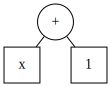

Derivada respecto de x:


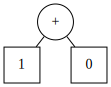

In [ ]:
probar_derivada("x+1","x")

Fórmula original:


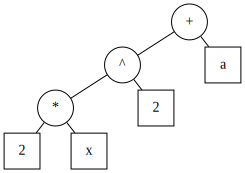

Derivada respecto de x:


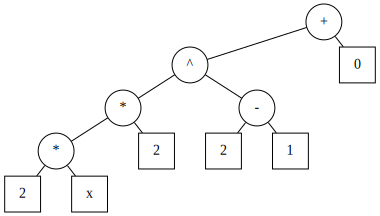

In [ ]:
probar_derivada("(2*x)^2+a","x")

Fórmula original:


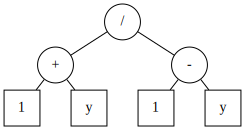

Derivada respecto de y:


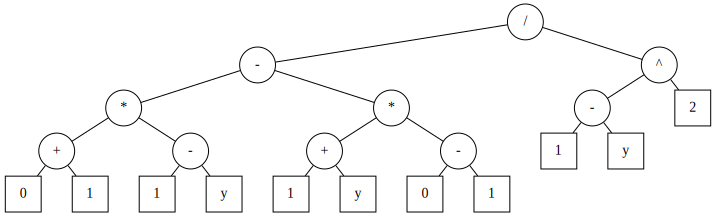

In [ ]:
probar_derivada("(1+y)/(1-y)","y")

Fórmula original:


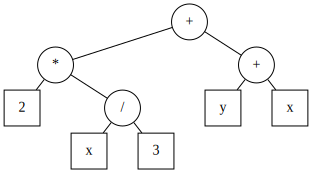

Derivada respecto de y:


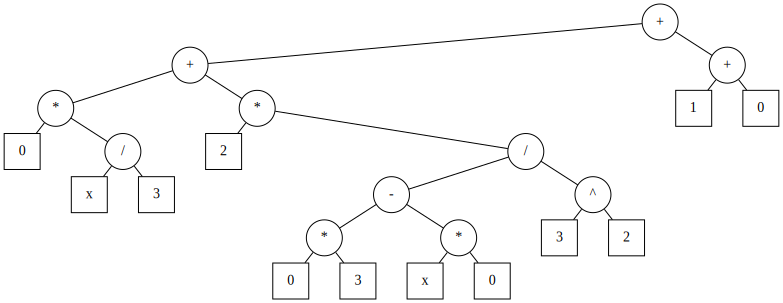

In [ ]:
probar_derivada("2*(x/3)+(y+x)","y")

Fórmula original:


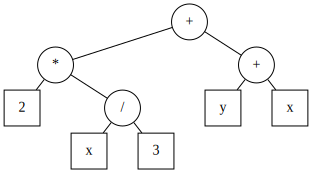

Derivada respecto de x:


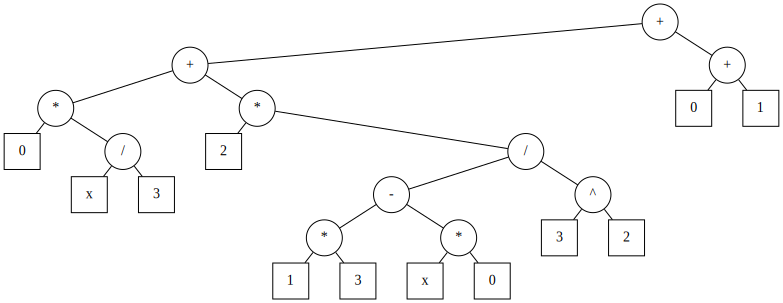

In [ ]:
probar_derivada("2*(x/3)+(y+x)","x")

## Simplificaciones

Como habrá visto, las fórmulas resultantes no son muy sencillas, pero también es obvio que se se podrían simplificar para que quedaran mucho más presentables. A continuación, proponga y describa cómo podrían implementarse algunas simplificaciones. Piense recursivamente. No es necesario que las implemente, pero si se atreve, agregue un método ``simplificar`` y pruébelo dibujando el árbol resultante.



---



Una mejora de este algoritmo puede ser estudiar el caso en que 
$$f(x) = \frac{1}{k}x$$
ya que actualmente calcula esta derivada por el método del cuociente, i.e.
$$f'(x) = \frac{(3)'x + 3(x)'}{3^{2}} = \frac{3}{9} = \frac{1}{3}$$

Otra mejora puede ser implementar una corrección sobre el input para conseguir expresiones más limpias, esto para funciones del estilo
$$g(x) = (f(x)+b)^{n}$$
al ser escritas como un producto de $n$ términos, se tendría un grafo (input) de altura $n$, en cambio al escribir esto como una potencia se simplifica a un grafo de altura $2$ para todo $n$ natural.


## ¿Qué hay que entregar?

Usted debe entregar este mismo archivo, modificado de acuerdo a lo que se pide. Haga todos los cambios necesarios para explicar y documentar adecuadamente su código. No olvide poner su nombre.